In [ ]:
from sc_generation_functions import *
import pickle

In [ ]:
# Specifically for Shapenet.v2
ignore = {}
ignore['non_car'] = ['d353bf0e0dfe3ac29cbc1c09129e1507','c0db588c8c816cd2dc668d3d64c871ae']
ignore['unclean_car'] = ['a75ff576da012340468bac13e007a6e9','52c589e86fd500cd4a42886683bb52d2','65d6433043c40046b82c0841410a924f','e09813b03bdfce83a23218adb697420d','d1acd4916d3d3b57c48db2ed8f5e994c','39b307361b650db073a425eed3ac7a0b', 'dda10fc985eea0868c368040825ed335', '471673f3f062abd473f10e6caaeca56','e2ceb9bf23b498dda7431386d9d22644','3804a264b503d5812e40b8f7ac380eb5','445185842d893b6978fe949fc1419876','95ebb3fd80f885ad676f197a68a5168a','ba89184f58f21ff63343f5fadc4a2136']
ignore['truck_bus'] = ['6aa8f648cc8df63ab2c17ece4015d55','84bc3155bc5c95bfaaafd94b9f216ef6','fd3b75f7f1e9172fb6f657757c95f74e','21999849a6a8aad752470de2774d6099','dfa6c32dec07727ee9d8921ebe6d5b8e','26b7a9c6c7e74829eabc798aaf5f039f', '433481aa8cde9b692e3dd7c278f108dd','cdfe4dc408f4ca84aaafd94b9f216ef6']
ignore['limo'] = ['c9b49f7b355528e5632dc979097a3ec0','b11c0c16e0eed1f4b8671dc42cc45273','eefce52130d223ba2dcbf88f7c685079','db432e9f280ffb1e3dd4bdc1dbab98bd','dd0817b9757b74c75d3a87a5c4dd9ce4','e4b1de221f2d66352638397725e10cf9','9d2b7938d426633b28044fe9244db50a','41d317b520eec9d38d3d01fa03326bb0','5a5b0e1cbb38bdb12d08a76380360b3b','bc9c588a00ae179fa2645d665a7d8fa','ed91b2509171fdc1c48492b454f1615a','17c32e15723ed6e0cd0bf4a0e76b8df5','9fa56c19e4d54cca99c8d14f483ffc82','2f1001870f90e06bc48492b454f1615a','4c53afe560e36d8380ba2a9340bf2d77','e0978173fcfc5203510556e7c3123591','fb8adbcf67d858fc28044fe9244db50a','9dee0ea5da388102e6d91d458fe44a15','7c7e5b4fa56d8ed654b40bc735c6fdf6','7f6031f1738d52546436916a86a90ed7','cc0c058e2eca523051fb05589f6b0d0e','9676e8250cdd90307d5394224a6aa067','282293948b21262769416db9b743e50b','202fbaeffaf49f4b61c6c61410fc904b','b4d258dc5a12f9f7ade7f700b19bcf4a','f1b97d671bb93ad928044fe9244db50a','9d77d4c959974035fab60fc805223a73','5c3fe4057ef12b6886ac29addefc0f11','56dc27e4374cf87132eaaf3b7c9989f6', '501ac8493044eff04d44f5db04bf14b8','55181c34dadb4f032db09455d18fca0']
ignore['invalid_lwratio'] = ['7e7f0637d6798113ddb4014f0e8d0dac', '492a339ce5da3fe8e4b68d3b17c43658', '99fce87e4e80e053374462542bf2aa29', 'f7f7b1b4021be11afaeea7738551d104', 'bfa01c632be2eb06e8a3b392b986583', '7c85e6cf9c4f46e91cc13e432d5756b8', '6b79cfceb6f614527e7afb83f93db294', '52c589e86fd500cd4a42886683bb52d2', 'd1acd4916d3d3b57c48db2ed8f5e994c', '65d6433043c40046b82c0841410a924f', 'f4498022df553505c35f22936e5aea5c', '3c310afdf363201cefe5f291bc2f5fd0', 'c0db588c8c816cd2dc668d3d64c871ae', 'd353bf0e0dfe3ac29cbc1c09129e1507', '9f7b4a82becac9cd5568b8cbf53329df', 'e4d1edc4cda4a6445fb81d6394b59c19','c30bf6d1ae428497c7f3070d3c7b9f30', '3804a264b503d5812e40b8f7ac380eb5', 'cdfe4dc408f4ca84aaafd94b9f216ef6', '55181c34dadb4f032db09455d18fca0', '95a6e03656bdff26f69bc9777f9c3c39', '957a686c3c9f956a3d982653fc5fd75b', '88c884dd867d221984ae8a5736280c', 'ba89184f58f21ff63343f5fadc4a2136', '1c7ddd2735778013ce50f18f6100cef6', 'd05aa55f9e5b4d10afe1d4530f4c6e24', 'a3e7603c0d9ef56280e74058ee862f05', '96ca20dd7caff0bb851f021b9ed69c58', '2df225b8df2633c231141a7d4d06dc13', '781b45d3eb625148248a78e10a40d8eb', '4e488242b665d85f40bc3b36a331b786', '48260abd4ff73f99473f10e6caaeca56', '56d463162ff5352cbd835ce3c63f4d10', '189cffefcdd5cb071a126804ae24042', '36b211593bfa7c2f7f33a9b0659de0d7', '36fe332c1b11696d51a95aaa6caba1d3', '69e99923c3cbcbcca9fe1734a6086750', '346917af7c9659e3814085552234c955', 'ca93e4d0ca75ab1bafe1d4530f4c6e24', '1e987cad6ca8a97a7a24dbc42a104ca8', 'd9049f432296ed36afe1d4530f4c6e24', 'd5c046451e5bd6826a9c18480b4632cb', '3ab98667cabf774e3343f5fadc4a2136', 'dc8765720d8d3828b3cf5236f651a8e6', '5ce9ef613933a245538f2c6e5c51cc7e', 'ac7e674eb67488dcafe1d4530f4c6e24', '5e4a1ac9bdce2766473f10e6caaeca56', '8402d2237afac94a1cf6f8e565096a1e', '791e45f93e9ba58071a126804ae24042', 'f296f3a83e09de75afe1d4530f4c6e24', '307e83044ed81f6c473f10e6caaeca56']
ignore['invalid_objfile'] = ['93ce8e230939dfc230714334794526d4', '9fb1d03b22ecac5835da01f298003d56', '302612708e86efea62d2c237bfbc22ca', '806d740ca8fad5c1473f10e6caaeca56', '2307b51ca7e4a03d30714334794526d4', 'd6ee8e0a0b392f98eb96598da750ef34', 'e6c22be1a39c9b62fb403c87929e1167', '986ed07c18a2e5592a9eb0f146e94477', '407f2811c0fe4e9361c6c61410fc904b', '5bf2d7c2167755a72a9eb0f146e94477', '3ffeec4abd78c945c7c79bdb1d5fe365', 'f5bac2b133a979c573397a92d1662ba5', '3c33f9f8edc558ce77aa0b62eed1492', 'ea3f2971f1c125076c4384c3b17a86ea', '7aa9619e89baaec6d9b8dfa78596b717', '5973afc979049405f63ee8a34069b7c5', '4ddef66f32e1902d3448fdcb67fe08ff', '207e69af994efa9330714334794526d4', '8070747805908ae62a9eb0f146e94477']
ignore['invalid_whratio'] = ['8ee2dfd1460eded9473f10e6caaeca56', 'e2ceb9bf23b498dda7431386d9d22644', '4e488242b665d85f40bc3b36a331b786', '93a813f96365c108f217b9504689397', '9de10b4469cdc435afe1d4530f4c6e24', '863f9284eec4a256e9d8921ebe6d5b8e', 'b9ae3fb6b027dc4294a553cca1043426']
ignore['combined'] = [idx for k,v in ignore.items() for idx in v]
print('Loading Waymo infos')
infos_path = '/SEE-MTDA/data/waymo/infos_openpcdetv0.3.0/waymo_infos_train.pkl'
with open(infos_path, 'rb') as f:
    infos = pickle.load(f)

In [ ]:
# We don't include trucks, buses or limos for this project
data_dir = '/SEE-MTDA/data/shapenet/ShapeNetCore.v2/02958343'
model_glob = glob.glob(f'{data_dir}/*')
models = set([model.split('/')[-1] for model in model_glob])
ignore_combined = set(ignore['combined'])
models.difference_update(ignore_combined)
models = list(models)
print(f'Filtered model ids has {len(models)} models')

In [ ]:
print('Generating frame infos')
waymo_lidar_height = 2.4
frames = []
for i, info in tqdm(enumerate(infos), total=len(infos)):    

    vmask = info['annos']['name'] == 'Vehicle'    
    car_label = info['annos']['gt_boxes_lidar'][vmask]     
    
    if len(car_label) > 0:
        frame = {}
        frame['car'] = {}
        frame['sign'] = {}

        # Waymo annotates forklifts etc as two parts, the arm and body. We ignore the arm.
        valid_carwidth = car_label[:,4] > 1.5
        car_label = car_label[valid_carwidth]

        car_label[:,2] -= waymo_lidar_height    
        frame['car']['label'] = car_label
        frame['car']['num_pts'] = info['annos']['num_points_in_gt'][vmask]
        frame['car']['num_obj'] = len(car_label)

        smask = info['annos']['name'] == 'Sign'
        sign_label = info['annos']['gt_boxes_lidar'][smask]   

        if len(sign_label) > 0:            
            sign_label[:,2] -= waymo_lidar_height
            frame['sign']['label'] = sign_label
            frame['sign']['num_pts'] = info['annos']['num_points_in_gt'][smask]
            frame['sign']['num_obj'] = len(sign_label)
        frames.append(frame)

In [ ]:
idx = 23
frame = frames[idx]

sampled_db = {}
exported_db = {}
unseen_list = models
scene_cars = get_tmeshes_with_box_labels(frame['car'], data_dir, sampled_db, unseen_list)
scene = populate_scene(scene_cars, frame['sign'])

In [ ]:
def cast_rays_at_point(scene, point, fov_deg=100, aspect_ratio=2, height_px=640):
    rays = o3d.t.geometry.RaycastingScene.create_rays_pinhole(
    fov_deg=fov_deg, # simulates a vertical fov of lidar
    center=point, # point where camera is looking at
    eye=[0,0,0], # position of the camera
    up=[0, 0, 1], # up vector
    width_px=aspect_ratio*height_px, # image width
    height_px=height_px, # image height
    )
    
    ans = scene.cast_rays(rays)
    hit = ans['t_hit'].isfinite()
    points = rays[hit][:,:3] + rays[hit][:,3:]*ans['t_hit'][hit].reshape((-1,1))
    return points.numpy()
    
    
def raycast_object(car, scene, npoints, min_fov=10, max_fov=60):
    centre = car['label'][:3]    
    
    fov_deg = np.random.normal(30, 30)
    fov_deg = np.clip(fov_deg, min_fov, max_fov)
    print(fov_deg)
    ray_pts = cast_rays_at_point(scene, centre, fov_deg=fov_deg, aspect_ratio=2, height_px=640)
    o3dbox = boxpts_to_o3dbox(car['bbox'])
    
    ret = {'ray_pts': convert_to_o3dpcd(ray_pts),
           'obj_pts': convert_to_o3dpcd(ray_pts).crop(o3dbox),
           'complete': car['mesh'].sample_points_uniformly(npoints),
           'bbox_pts': car['bbox'],
           'model_id': car['model_id'],
           'label': car['label'],
           'fov_deg':fov_deg}
    return ret

car_idx = 3
car = scene_cars[car_idx]
data = raycast_object(car, scene, npoints=16384)

In [ ]:
data

In [ ]:
o3d.visualization.draw_geometries([data['obj_pts']])

In [8]:
def sph2cart(points):
    r, azimuth, elevation = points[:,0], points[:,1], points[:,2]
    x = r*np.sin(elevation)*np.cos(azimuth)
    y = r*np.sin(elevation)*np.sin(azimuth)
    z = r*np.cos(elevation)
    return np.concatenate((x[:,np.newaxis],y[:,np.newaxis],z[:,np.newaxis]), axis=1)

def cart2sph(points):
    # elevation is up-down, azimuth is left-right
    x,y,z = points[:,0], points[:,1], points[:,2]
    r = np.linalg.norm(points, axis=1)
    elevation = np.arctan2(np.linalg.norm(points[:,:2],axis=1),z) # also = np.arccos(z/r)
    azimuth = np.arctan2(y,x) # theta in radians, lidar is 360 degrees hence the 3.14 to -3.14 values
    
    return np.concatenate((r[:,np.newaxis],azimuth[:,np.newaxis], elevation[:,np.newaxis]), axis=1)    

In [1]:
obj_pts = np.asarray(data['obj_pts'].points)
sph_pts = cart2sph(obj_pts)
hist = np.histogram(sph_pts[:,2], bins='sqrt')        
ring_indices = np.digitize(sph_pts[:,2], hist[1][np.argwhere(hist[0] > 0).squeeze(1)])
num_rings = max(ring_indices)

# Skip at most num_rings*0.3 since after that, most of the values
# only lead to giving 3-5 rings. You'd have a predominantly 3-5 ring
# object dataset...
sel_n_ring = np.random.randint(1,max(np.ceil(num_rings*0.3),2))
print(f'Selecting every {sel_n_ring}/{num_rings} ring to give {np.ceil(num_rings/sel_n_ring)} rings')

# Start from a random ring and select every N ring
choose_rings = np.unique(ring_indices)[np.random.randint(0,max(np.ceil(num_rings*0.1),1))::sel_n_ring]
mask = np.in1d(ring_indices, choose_rings)

# 20% chance to do a 1-2 ring scenario since not all nuscenes is 1-2 rings
onetwo_ring = np.random.choice([False, True], replace=False, p=[0.8, 0.2])
if onetwo_ring and len(choose_rings) > 2:
    onetwo_ring_idxs = np.random.choice(choose_rings, size=np.random.randint(1,3))
    onetwo_mask = np.in1d(ring_indices, onetwo_ring_idxs)
    
# Skip only at most 30% of the num pts in a ring
_, counts = np.unique(ring_indices[mask], return_counts=True)
sel_n_hpts = np.random.randint(1, max(np.ceil(min(counts)*0.5), 2))
pts = sph2cart(sph_pts[mask][np.random.randint(0,min(counts))::sel_n_hpts])
print(f'Selecting every {sel_n_hpts}th point')

if onetwo_ring:
    sel_n_hpts = min(20, sel_n_hpts)    
    onetworing_pts = sph2cart(sph_pts[onetwo_mask][np.random.randint(0,min(counts))::sel_n_hpts])
    if len(onetworing_pts) < 5:
        out = pts
    else:
        out = onetworing_pts
else:
    if len(pts) > 5:
        out = pts

print('in.shape = ', obj_pts.shape)
print('out.shape = ', out.shape)

NameError: name 'np' is not defined

In [28]:
o3d.visualization.draw_geometries([convert_to_o3dpcd(pts)])

In [1014]:
stdev_bounds = [0.005,0.01]
noise_stdev = np.random.uniform(stdev_bounds[0], stdev_bounds[1])
noise = np.random.normal(0, noise_stdev, len(out)) 

sph_pts = cart2sph(out)
sph_pts[:,0] += noise
resampled_pts = sph2cart(sph_pts)

In [1015]:
npoints = 1024

# Duplicate points
tiled_pts = np.tile(resampled_pts, (int(np.ceil(npoints/len(resampled_pts))),1))

# Randomly select from duplicated points
choice = np.random.permutation(tiled_pts.shape[0])
resampled_pts = tiled_pts[choice[:npoints]]

In [1016]:
o3d.visualization.draw_geometries([convert_to_o3dpcd(resampled_pts)])

In [1019]:
resampled_pts.astype(np.float())

TypeError: data type not understood

60.0


Text(0.5, 0, 'Select every N rings')

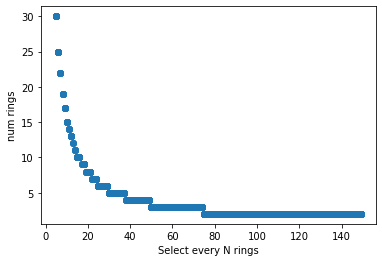

In [603]:
num_rings = 150
n = np.random.randint(5,max(np.ceil(num_rings),2), size=1000)
print(num_rings*0.3)
num_out_ring = np.ceil(num_rings/n)
plt.scatter(n, num_out_ring)
plt.ylabel('num rings')
plt.xlabel('Select every N rings')

In [1026]:
import torch

fakepc = [torch.rand(1024,3) for i in range(16)]
torch.stack(fakepc).shape

torch.Size([16, 1024, 3])